### Homework Group 60 - Abhijit Anil (aa94375), Antra Sinha (as224589)

# Assignment 2 #
### Due: Friday, September 22 to be submitted via Canvas by 11:59 pm ###
### Total points: **85** ###

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

### Note that:
###1. Only one student per group needs to submit the assignment on Canvas;
###2. Make sure to include both students' names, UT EIDs and homework group number in your submitted notebook;
###3. Please make sure your code runs, the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)
### 4. Late submissions receive 0 points.

# Question 1: Bias and Variance (**10 pts**)

(a). (**4 pts**) Describe the difference between model bias and the bias of a point estimator.

(b) (**6 pts**). How can you use a learning curve to determine whether a model is overfitting  (for a given sample size)? Discuss this with respect to the observed train and validation error curves. How does your answer change if the model you are trying to determine is underfitting?

**Answer 1(a): Difference between Model Bias and Bias of a Point Estimator**

While both model bias and bias of a point estimator involve measuring errors, they are conceptually different and applied in distinct contexts within machine learning and statistics. Model bias assesses the predictive accuracy of machine learning models, while bias of a point estimator quantifies the systematic error in statistical estimators used to estimate population parameters. Here are the key differences between model bias and bias of a point estimator:

Model bias refers to the inability of a machine learning model to accurately capture the true underlying relationship in the data. It assesses how far the predicted values generated by the model are from the true values. Bias of a point estimator refers to the difference between the expected value of an estimator (a statistic) and the true value of the population parameter it is estimating.

Model bias is a characteristic of machine learning models. It indicates whether the model tends to consistently overestimate or underestimate the target variable. It relates to the predictive accuracy of the model.Bias of a point estimator is a property of statistical estimators. It measures the systematic error or tendency of the estimator to be consistently higher or lower than the true population parameter. It relates to the quality of the estimator itself.

Model bias is measured on the training dataset whereas Bias of a point estimator is calculated based on a sample by comparing the expected value (mean) of the estimator across multiple samples to the true population parameter. It quantifies how the estimator behaves on average.

**Answer 1(b): Using Learning Curves to Detect Overfitting and Underfitting**

To determine whether a model is overfitting or underfitting based on the learning curve, you can observe the behavior of the training and validation error curves with respect to the given sample size.

### Overfitting:
Overfitting is characterized by a model that has learned the training dataset too well but struggles to adjust to and predict new data. Here's how we can use the learning curve to diagnose overfitting:

- Training Error Curve: The training error continues to decrease as the model learns the training data. This is because the model is getting better at fitting the training data, including noise and random fluctuations.

- Validation Error Curve: Initially, the validation error curve decreases as the model starts to generalize better to unseen data. However, it eventually starts increasing again, indicating that the model is becoming too specialized and starts to perform worse on the validation dataset. In summary, you can identify overfitting by observing that the training error continues to decrease while the validation error eventually starts increasing. This suggests that the model is too complex or has too many parameters, and it starts fitting noise in the training data leading to a bad model.

### Underfitting:
Now, let's consider how this diagnosis changes if the model is underfitting. An underfitting model is too simple to capture the underlying patterns or relationships within the training data. It essentially fails to learn from the data effectively.

- Training Error Curve: The training error curve remains flat or exhibits minimal changes as training continues. This indicates that the model is too simplistic and cannot learn the training data effectively.

- Validation Error Curve: The validation error curve may also remain high and relatively flat or decrease slightly but not significantly. It reflects the model's inability to capture the underlying patterns in the data. In the case of underfitting, both the training and validation error curves do not show significant improvement. This suggests that the model is too simple or lacks the capacity to fit the training data adequately.

In summary, for underfitting, the training error curve remains flat, and the validation error curve does not show the characteristic increase observed in overfitting. Instead, both curves indicate poor performance due to the model's simplicity and inability to capture the data's patterns. To address underfitting, you would typically need to increase the model's complexity or use a more suitable algorithm to better fit the training data.

# Question 2: Bias-Variance Exploration (**20 points**)
Consider a function $g$ such that $g(x)=2sin(\pi
x)cos(3\pi x^2)$. We will try to fit this function using a simple (binning based) piecewise constant function with varying number of bins. Here the number of bins controls the model complexity.

Note: problem below uses the statistics notation: target is y and your estimates are $y_{hat}$.


a) (2 points) Generate a dataset $(D = X,Y)$ by generating a set of 1-dimensional x's and y's in the following way -
*  $x_i = \frac{i}{2000}$ for each $i$ in $1, 2, 3 \ldots 2000$.
* Then, for each of the $x_i$'s obtain $y_i = 2sin(\pi x_i)cos(3\pi x_i^2)+ N(0,1)$ where $N(0,1)$ denotes the normal distribution with mean 0 and variance 1.

Create 10 such datasets by independently repeating the entire process 10 times. Plot any one of the generated datasets.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
def generate_data(num_points):
  x = np.arange(1, num_points + 1) / num_points
  ### START CODE ###
  # Compute y according to the labeling function g
  y = 2 * np.sin(np.pi * x) * np.cos(3 * np.pi * x**2) + np.random.normal(0, 1, num_points)
  ### END CODE ###
  return x,y

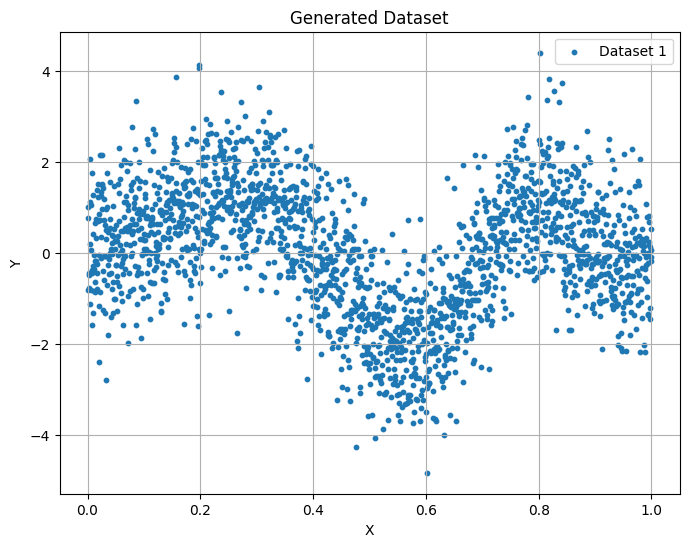

In [2]:
datasets = {}
for j in range(10):
  datasets[j] = {}
  datasets[j]['X'], datasets[j]['Y'] = generate_data(2000)

### START CODE ###
# Plot y v.s. x of any one of the dataset
plt.figure(figsize=(8, 6))
plt.scatter(datasets[0]['X'], datasets[0]['Y'], s=10, label='Dataset 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated Dataset')
plt.legend()
plt.grid(True)
plt.show()
### END CODE ###


b) (5 points) Consider an estimator of function $g$, $f(x)$ that divides the x's into $K$ bins such that there are $m = n/K$ data points in each bin and the predicted y for all points in that bin is the mean of all the $y$'s in the bin.
$$
f(x) = \sum_{j=1}^{K} \bar{y}_j \mathbb{1}(x \in \text{bin } j)
$$
where
$$
\bar{y}_j = \frac{1}{m}\sum_{i=j*m}^{(j+1)*m-1} y_i.
$$
Implement this estimator. Obtain $Y_{hat} = f(x)$ for one of the datasets created above by using $K=25$ and plot the predicted $Y_{hat}$ along with $X$ and $Y$.



In [3]:
### START CODE ###
# Implement Estimator
# Define the estimator function
def estimator(x, y, K):
    n = len(x)  # Total number of data points
    m = n // K  # Number of data points in each bin
    Y_hat = np.zeros(n)  # Initialize Y_hat to zeros

    for j in range(K):
        start_idx = j * m
        end_idx = (j + 1) * m
        bin_x = x[start_idx:end_idx]
        bin_y_mean = np.mean(y[start_idx:end_idx])
        Y_hat[start_idx:end_idx] = bin_y_mean

    return Y_hat

# Choose one of the generated datasets
dataset_idx = 0
x = datasets[dataset_idx]['X']
y = datasets[dataset_idx]['Y']

# Define the number of bins
K = 25

# Obtain Y_hat using the estimator
Y_hat = estimator(x, y, K)
### END CODE ###

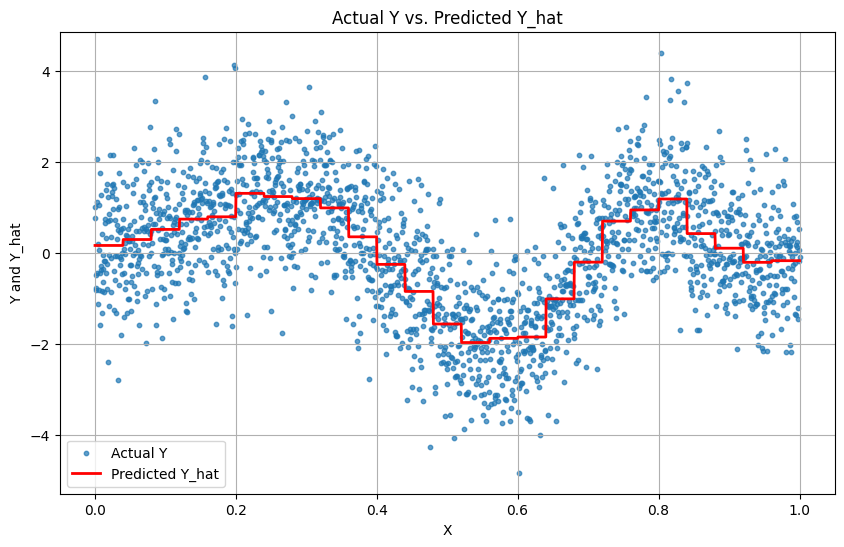

In [4]:
### START CODE ###
# Plot predicted y_{hat} along with X and Y
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=10, label='Actual Y', alpha=0.7)
plt.plot(x, Y_hat, color='red', label='Predicted Y_hat', linewidth=2)
plt.xlabel('X')
plt.ylabel('Y and Y_hat')
plt.title('Actual Y vs. Predicted Y_hat')
plt.legend()
plt.grid(True)
plt.show()
### END CODE ###

c) (3 points) What do you think will happen to the MSE, the bias and the variance as the number of bins $K$ is increased?


As the number of bins, K, is increased, several things are likely to happen to the Mean Squared Error (MSE), bias, and variance:

1. **MSE (Mean Squared Error):**

   - **Decrease for training data but decrease initially, then possibly increase for test data:** When you increase the number of bins (K), the model becomes more complex and flexible. This increased flexibility allows the model to fit the training data more closely. As a result, the training error (MSE) is likely to decrease because the model can capture more details in the data. On test data however, the MSE will start to decrease, but as the model gets more complex, the MSE will start rising as it has been overfit to the training data as at some point, each bin will correspond to each/single data point.


2. **Bias:**

   - **Decrease initially:** As bins increases, the model becomes more complex and can better capture the underlying patterns in the data. This usually leads to a decrease in bias, as the model can better understand the relationship and patterns in the data.

   - **Possibly stabilize:** Bias may stabilize or continue decreasing after a certain point because further increasing the number might not significantly improve the model's ability to fit the data. There's a limit to how much bias can be reduced by increasing model complexity.

3. **Variance:**

   - **Increase:** As the number of bins increase, the model becomes more complex, and it can fit the data with higher granularity. This often leads to an increase in variance because the model becomes more sensitive to the outliers of noise in the dataset.

   - **Possibly stabilize:** Similar to bias, there's a point at which increasing the bins may not really increase variance further. Variance may stabilize or increase at a low rate.


d) (5 points) For each dataset, vary the number of bins $K \in \{2,5,10,25,50,100,250, 500, 1000\}$ and obtain the predictions. Also, for any one of the datasets (your choice), compute and plot the MSE obtained with varying $K$.

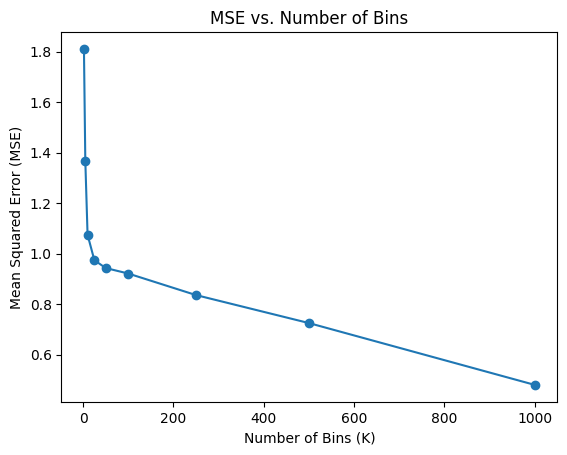

In [5]:
mse_scores_all = {}
Y_hat_all = {}
K = [2,5,10,25,50,100,250,500,1000]
for i in range(10):
  mse_scores = []
  dataset_idx = i
  x = datasets[dataset_idx]['X']
  y = datasets[dataset_idx]['Y']
  for n in K:
    ### START CODE ###
    # For the chosen dataset, compute y_hat
    Y_hat = estimator(x, y, n)
    ### END CODE ###

    ### START CODE ###
    # Compute MSE
    mse = mean_squared_error(y, Y_hat)
    ### END CODE ###
    mse_scores.append(mse)
  
  Y_hat_all[dataset_idx] = Y_hat
  mse_scores_all[dataset_idx] = mse_scores

plt.plot(K,mse_scores_all[0],marker='o')
plt.xlabel('Number of Bins (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Number of Bins')
plt.show()

e) (5 points) Recall the definitions of the bias and variance, and now given the predictions obtained from 10 different datasets, compute the (sample) bias and variance of the model for each of the $K \in \{2,5,10,25,50,100,250,500,1000\}$ and plot $K$  bias-squared vs $K$ and variance vs. $K$  on the same plot.
We are using the term "sample" to remember that bias/variance are "expected quantities" that we are approximating by considering only 10 models, one per dataset.

If y_pred denotes the 2000 x 10 2-D matrix of estimates for 2000 data points and obtained by the function estimated from the 10 datasets, use the following code to obtain the sample bias and variance.

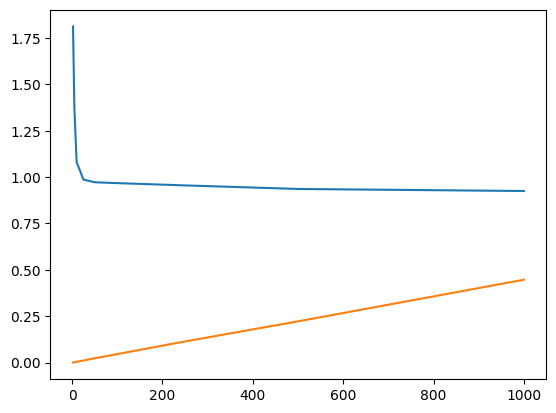

In [6]:
bias_vals = []
var_vals = []
K = [2,5,10,25,50,100,250,500,1000]
pred_y = np.zeros((len(datasets[0]['Y']),10)) # axis 0: number of data points, axis 1: number of datasets (10)

for n in K:
  for j in datasets.keys():
    x = datasets[j]['X']
    y = datasets[j]['Y']
    ### START CODE ###
    # Estimate y_{hat}
    y_hat = estimator(x, y, n)
    ### END CODE ###
    pred_y[:,j] = y_hat

  ### START CODE ###
  # Compute the mean of the estimates over 10 datasets for each input x_{i}
  avg_yhat = np.mean(pred_y, axis=1)  # 1D array of shape (2000,)
  # Compute the MSE between avg_yhat and y as bias
  bias = np.mean((avg_yhat - datasets[0]['Y'])**2)
  # Compute the variance of the estimates over 10 datasets for each input x_{i}, then average over all inputs
  var_yhat = np.mean(np.var(pred_y, axis=1))
  ### END CODE ###
  bias_vals.append(bias)
  var_vals.append(var_yhat)
plt.plot(K, bias_vals)
plt.plot(K, var_vals)
plt.show()

# Question 3: Stochastic Gradient Descent Improvements (**10 pts**)

## Part 1. (**5 pts**) ##
Read this [blog](https://medium.com/optimization-algorithms-for-deep-neural-networks/gradient-descent-with-momentum-dce805cd8de8) on medium and describe in your own words how momentum leads to a faster convergence of the loss function.


### Ans: Part 1 -

Gradient descent with momentum leads to a faster convergence of the loss function by significantly reducing the vertical oscillations which allows the optimization algorithm to take a more direct and efficient path to the local optima. The algorithm uses an exponentially weighted moving average of the past gradients to smooth out the vertical oscillations in every iteration of gradient descent. The vertical oscillations are brought closer to 0 since both positive and negative gradient values are used. 
Since the vertical oscillations are reduced, it allows for a direct path to the local optima rather than the back and forth as is in a standard gradient descent algorithm.

## Part 2. (**5 pts**) ##
Read this [blog](https://sweta-nit.medium.com/batch-mini-batch-and-stochastic-gradient-descent-e9bc4cacd461) on medium and explain in your own words the advantages of Mini-batch Stochastic Gradient Descent.


### Ans: Part 2 -

Following are the advantages of Mini-batch Stochastic Gradient Descent (MGD):

1. MGD updates the model more frequently compared to Batch Gradient Descent (BGD). Instead of waiting for all training examples to be evaluated before updating the model, MGD updates the model after processing each mini-batch, leading to faster progress during training.

2. MGD strikes a balance between the memory consumption of BGD and the high computational demands of Stochastic Gradient Descent (SGD). It doesn't require storing the loss for all individual training examples, as in SGD, but it doesn't consume as much memory as BGD, which processes the entire dataset in one go.

3. Mini-batch updates provide a computationally more efficient process than SGD. While SGD updates the model for each individual training example, MGD updates it for a small batch of examples, reducing the noise in the updates compared to SGD.

4. In MGD, there is more control over the learning rate compared to SGD. Since we are working with mini-batches, learning rate can be adjusted to balance convergence speed and stability. This allows to fine-tune the optimization process.

In essence, Mini-batch Stochastic Gradient Descent combines some of the advantages of both BGD and SGD, offering a good compromise between computational efficiency and convergence speed.


# Question 4: Stochastic Gradient Descent (30 pts)

## Part 1. (**10 pts**) Stochastic gradient descent derivation ##

Use stochastic gradient descent to derive the coefficent updates (assuming squared loss is being used as the cost function) for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：

$$ y = w_0 + w_1e^{-x_1} + w_2 x_1 + w_3x_1x_2 $$




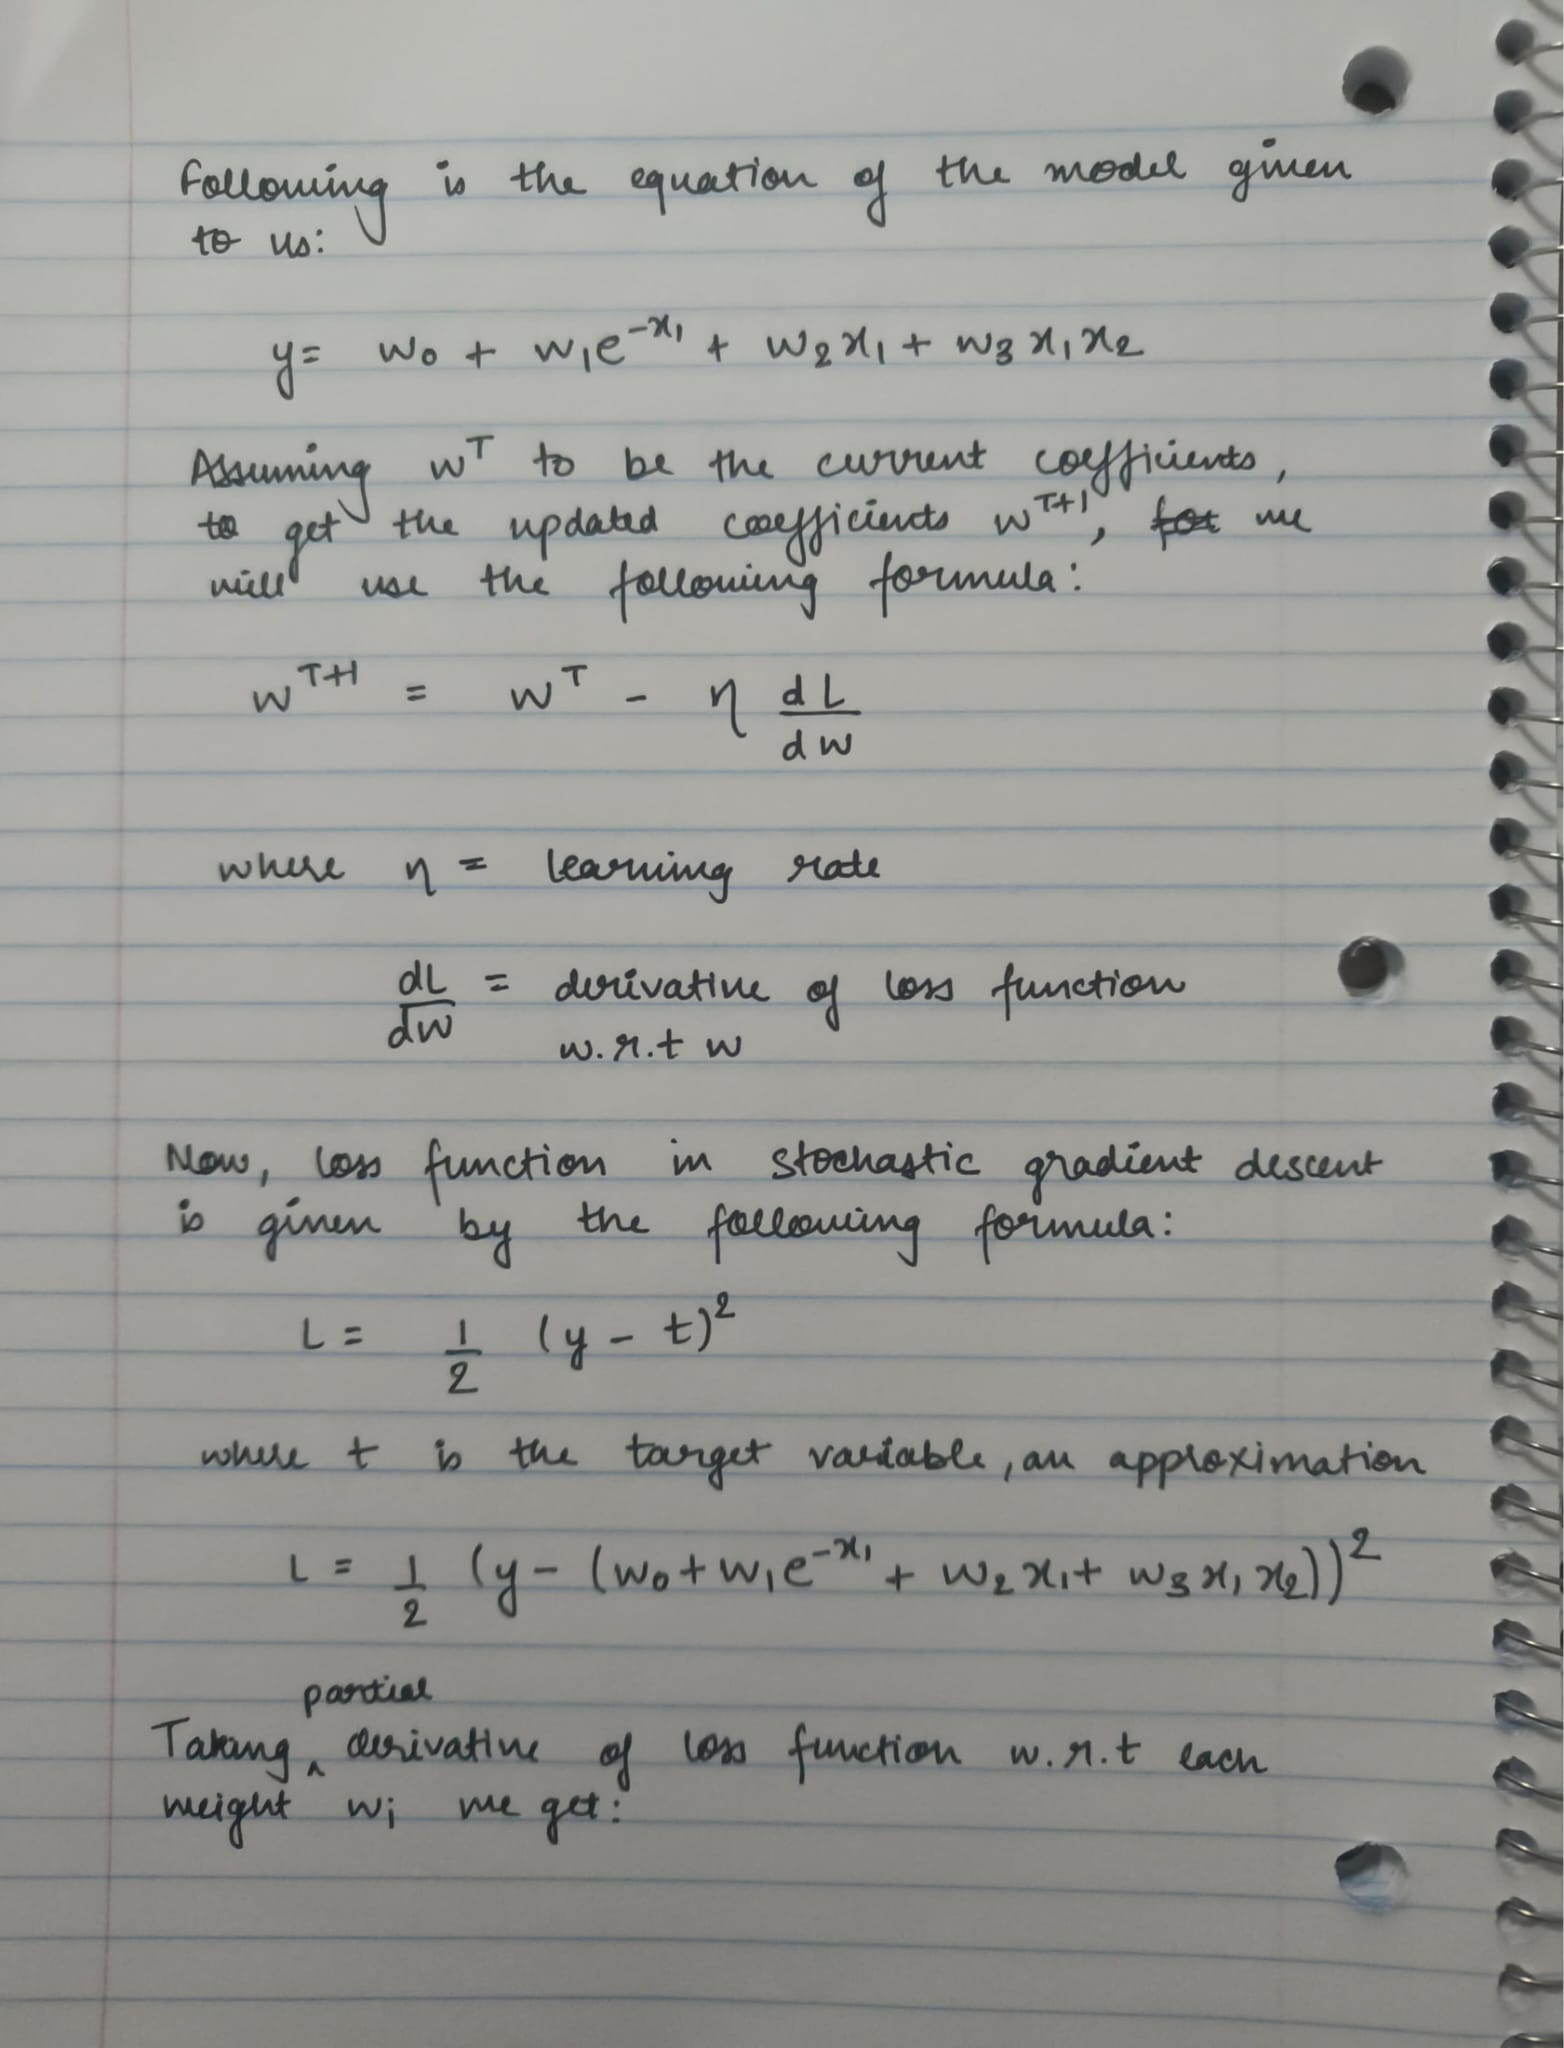

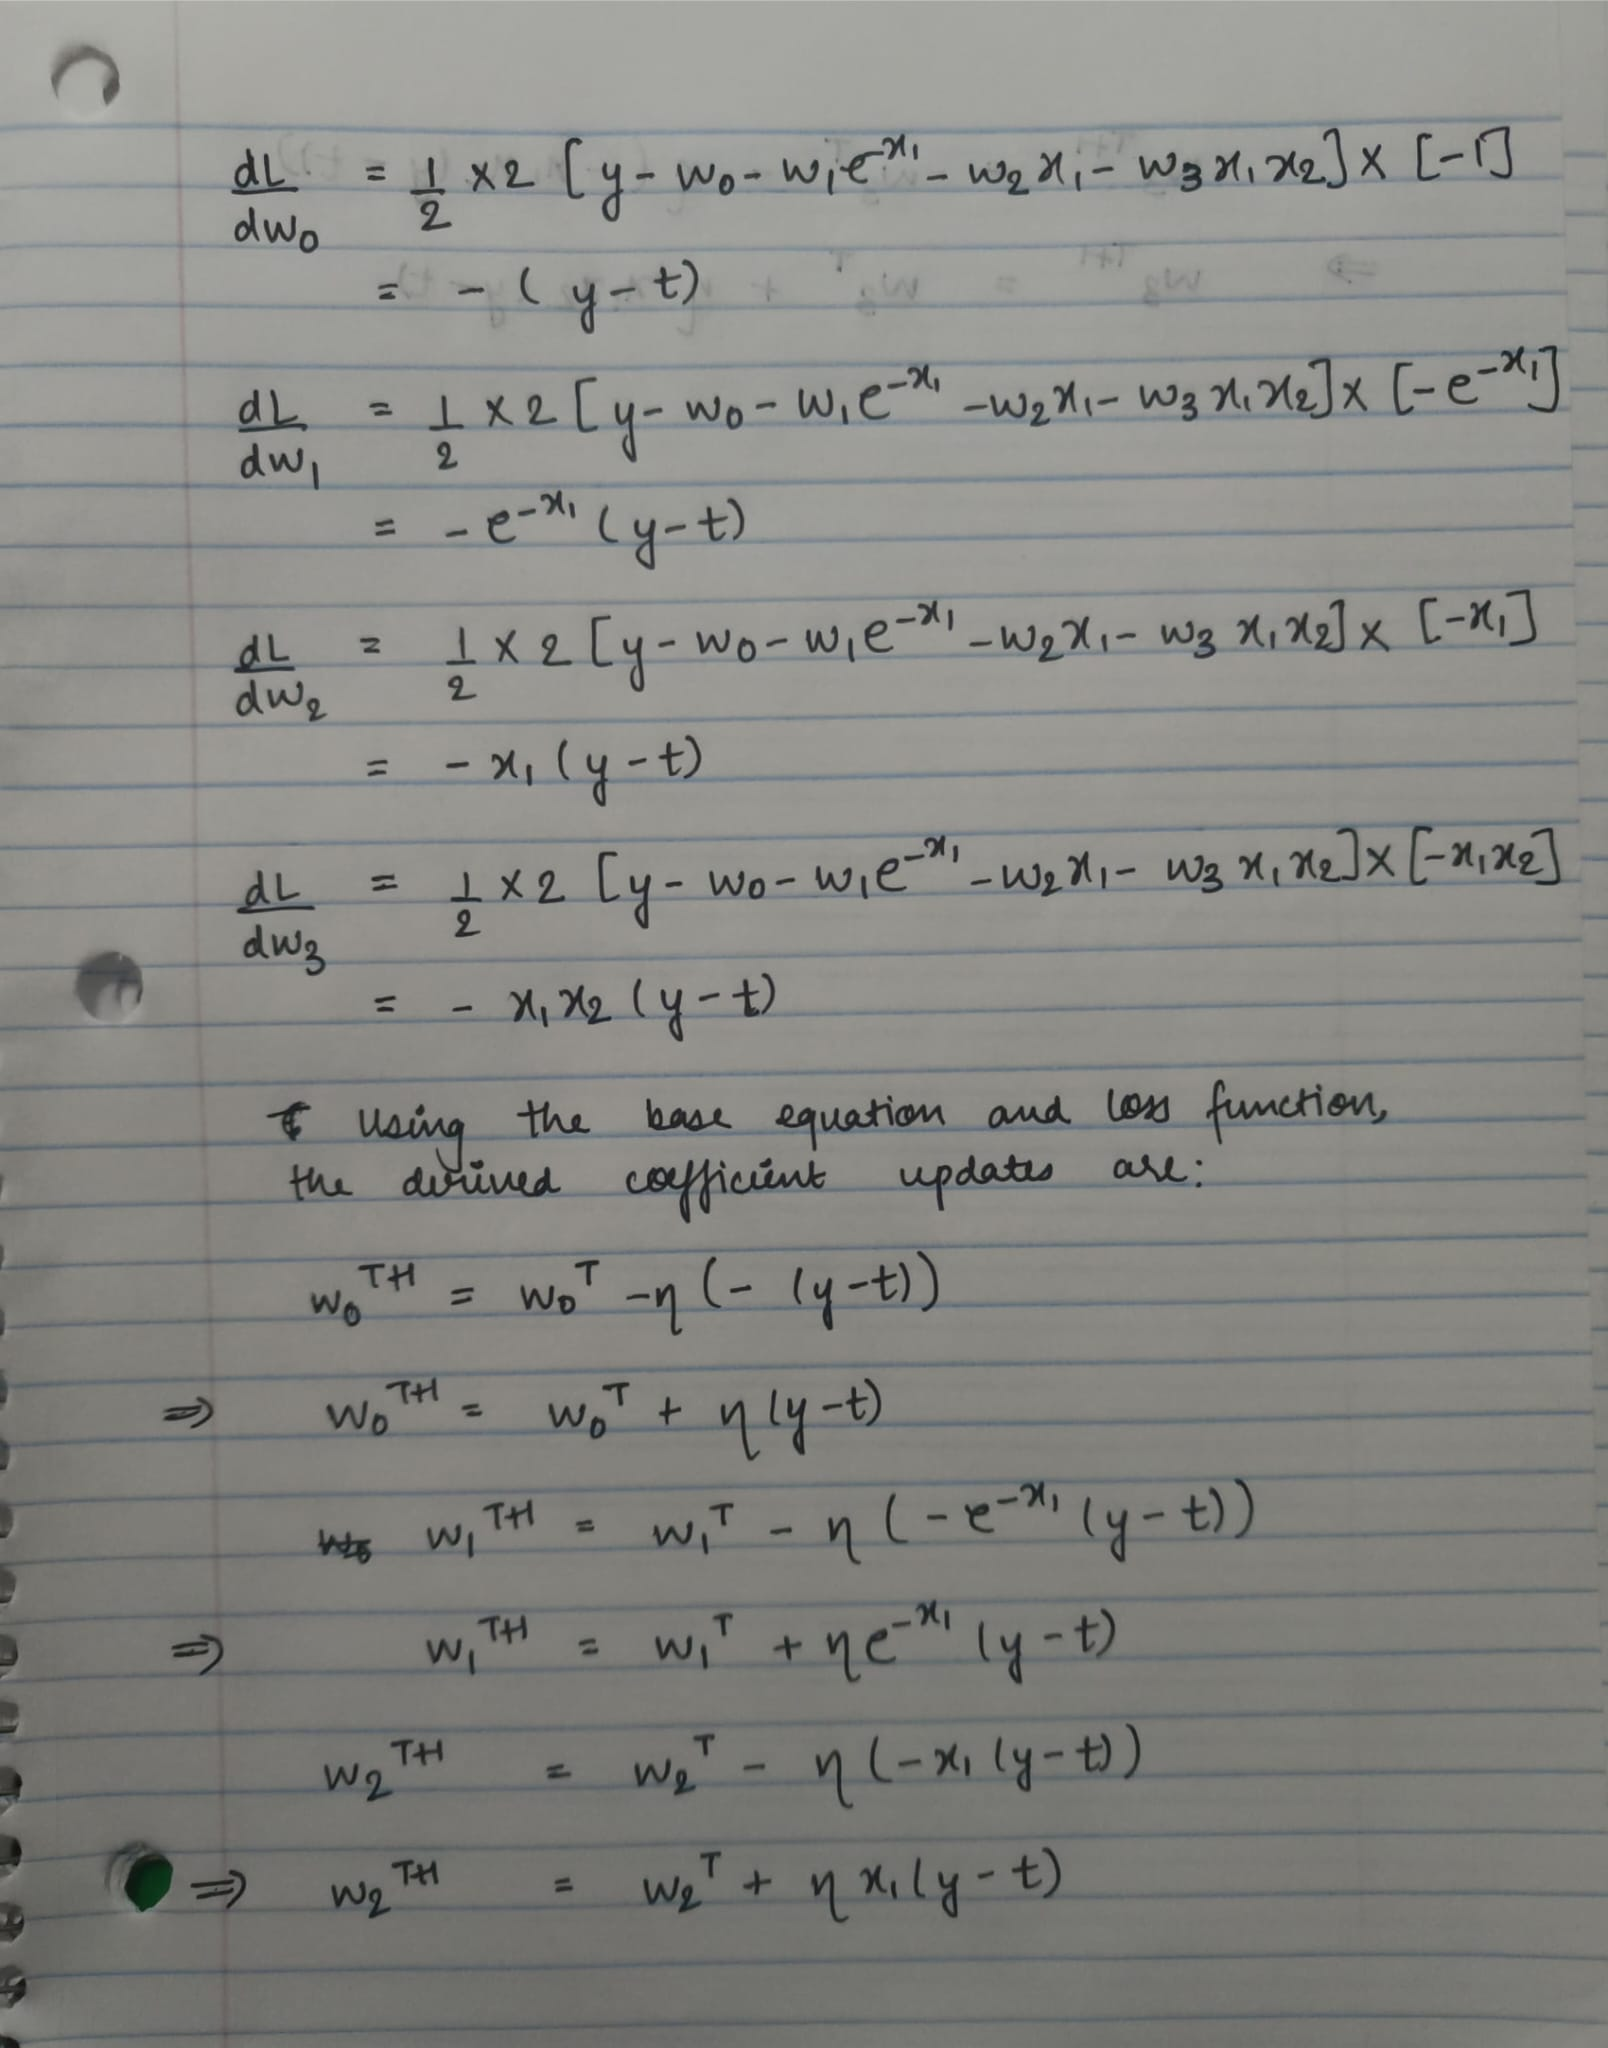

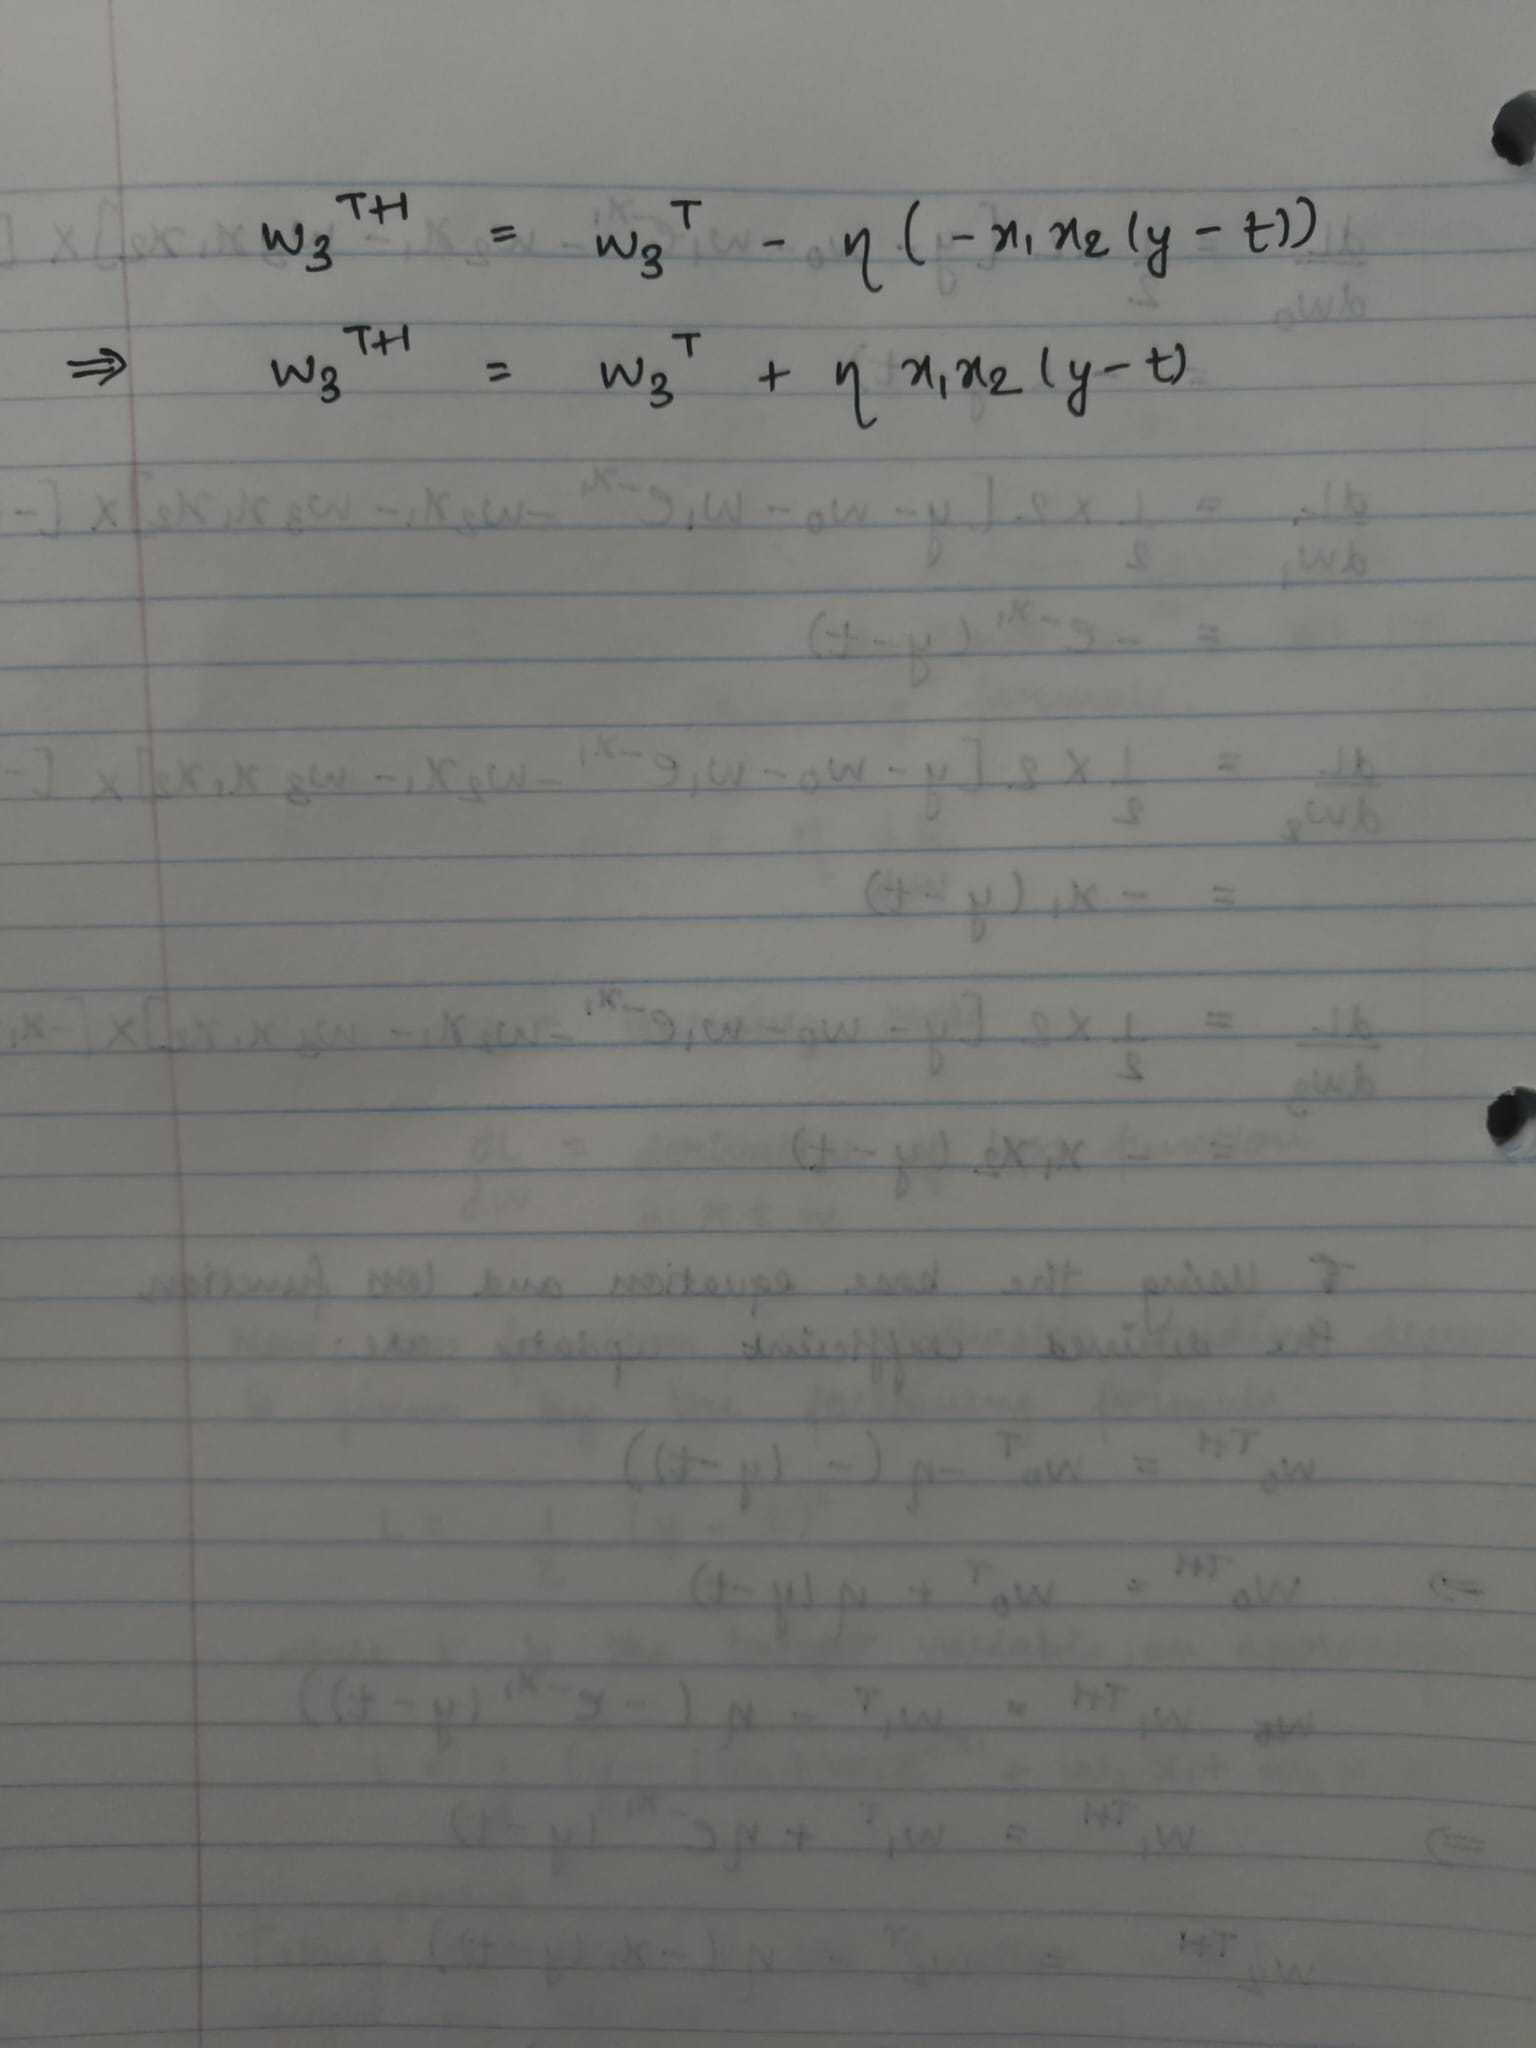

In [7]:
from IPython.display import Image, display

img_path = ['P1.jpeg','P2.jpeg','P3.jpeg' ] 
for x in img_path:
    display(Image(filename=x))

## Part 2. (**20 pts**) Stochastic gradient descent coding ##

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1e^{-x_1} + w_2x_1 + w_3x_1x_2 $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values).

a) (**15 pts**) Use the expression derived in part 1 to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) .

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [8]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
# from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
# uploaded = files.upload()

In [9]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:

    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)

    def sgd(self, gradient):
        # Update the self.coef using SGD
        ### START CODE ###
        step_size = self.learning_rate * gradient
        self.coef = self.coef - step_size
        ### END CODE ###

    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                ### START CODE ###
                error = y[i] - self.linearPredict(X[i])
                ### END CODE ###

                # Compute gradients
                ### START CODE ###
                gradient = - error * X[i] +  ( self.regularization * self.coef )
                ### END CODE ###

                # Update weights
                ### START CODE ###
                if update_rule == 'sgd':
                    self.sgd(gradient)
                ### END CODE ###

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = np.exp(-X[:,0])
        x[:,2] = X[:,0]
        x[:,3] = X[:,0]*X[:,1]

        return x

    def linearPredict(self, X):
        # Compute the dot product of self.coef and X
        ### START CODE ###
        return np.dot(X, self.coef)
        ### END CODE ###

In [10]:
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

In [11]:
# Iterate through all combinations of learning rates and regularization strength
# Use your Regression class to fit the data and record MSEs
### START CODE ###
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Store MSEs for all combinations
mse_results = []

for lr in learning_rate:
    for reg in regularization:
        model = Regression(learning_rate=lr, regularization=reg, n_epoch = n_epochs)
        model.fit(X, y)
        mse_results.append({
            'Learning Rate': lr,
            'Regularization Strength': reg,
            'MSE': model.lowest_mse
        })

# Convert the MSE results to a DataFrame
mse_df = pd.DataFrame(mse_results)
### END CODE ###

The two best combinations of learning rate and regularization strength:
   Learning Rate  Regularization Strength       MSE
6          0.010                        0  0.027391
3          0.001                        0  0.030496


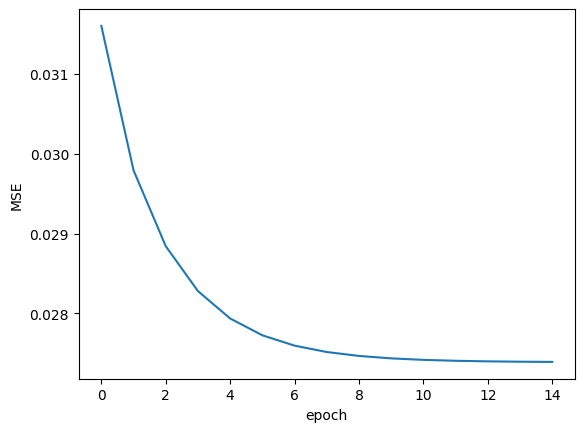

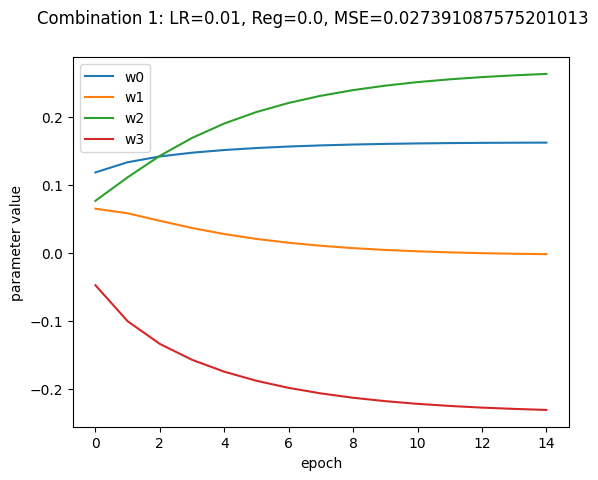

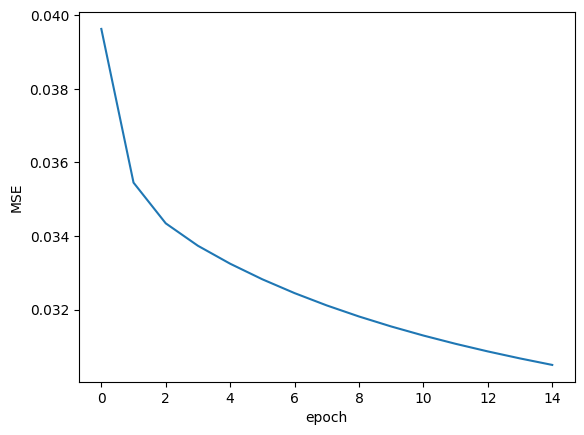

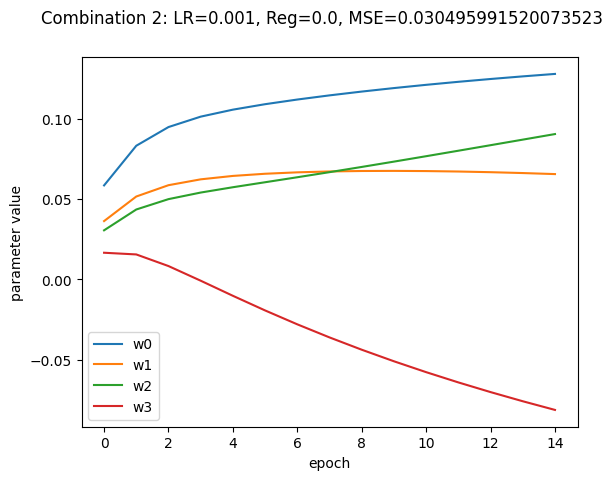

In [12]:
# For the best two combinations, use the plot option in Regression.fit() to plot MSE and parameters as a function of epoch (15 epochs)
### START CODE ###
# Find the two best combinations
best_combinations = mse_df.nsmallest(2, 'MSE')

# Print the two best combinations
print("The two best combinations of learning rate and regularization strength:")
print(best_combinations)

# Plot MSE vs. Learning Rate for best combination
for i in range(2):
    lr = best_combinations.iloc[i]['Learning Rate']
    reg = best_combinations.iloc[i]['Regularization Strength']
    model = Regression(learning_rate=lr, regularization=reg, n_epoch=15)
    model.fit(X, y, plot=True)
    plt.suptitle(f"Combination {i + 1}: LR={lr}, Reg={reg}, MSE={best_combinations.iloc[i]['MSE']}")
### END CODE ###

# Question 5: Visualizing Gradient Descent (**15 pts**) #

## Part 1. **(10 pts)** Coding ##

In this exercise, you are going to visualize four batch update steps of gradient descent for a  linear regression model with two parameters (i.e. weights, indicated by $\theta$).

The true target function is $t = \theta_{0} + \theta_{1}x$ with $\theta_{0}=2$ and $\theta_{1}=0.5$.

Try the following two initializations:
* $\theta_{0}=0$ and $\theta_{1}=0$
* $\theta_{0}=0$ and $\theta_{1}=-4$

and try the following three learning rates:
* 0.5
* 1
* 2.1

Therefore, there will be **six** combinations or settings to consider in total. For each setting, you will plot (a) the data and the changing linear regression fit and (b) the model parameters moving in the weight space after every update.

In [13]:
# Generate data
np.random.seed(42)
m = 20
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x + np.random.normal(0, 0.2, size=x.shape)

In [14]:
def loss_func(theta0, theta1):
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y - model(x, theta0, theta1))**2, axis=2)/2

def model(x, theta0, theta1):
    return theta0 + theta1 * x

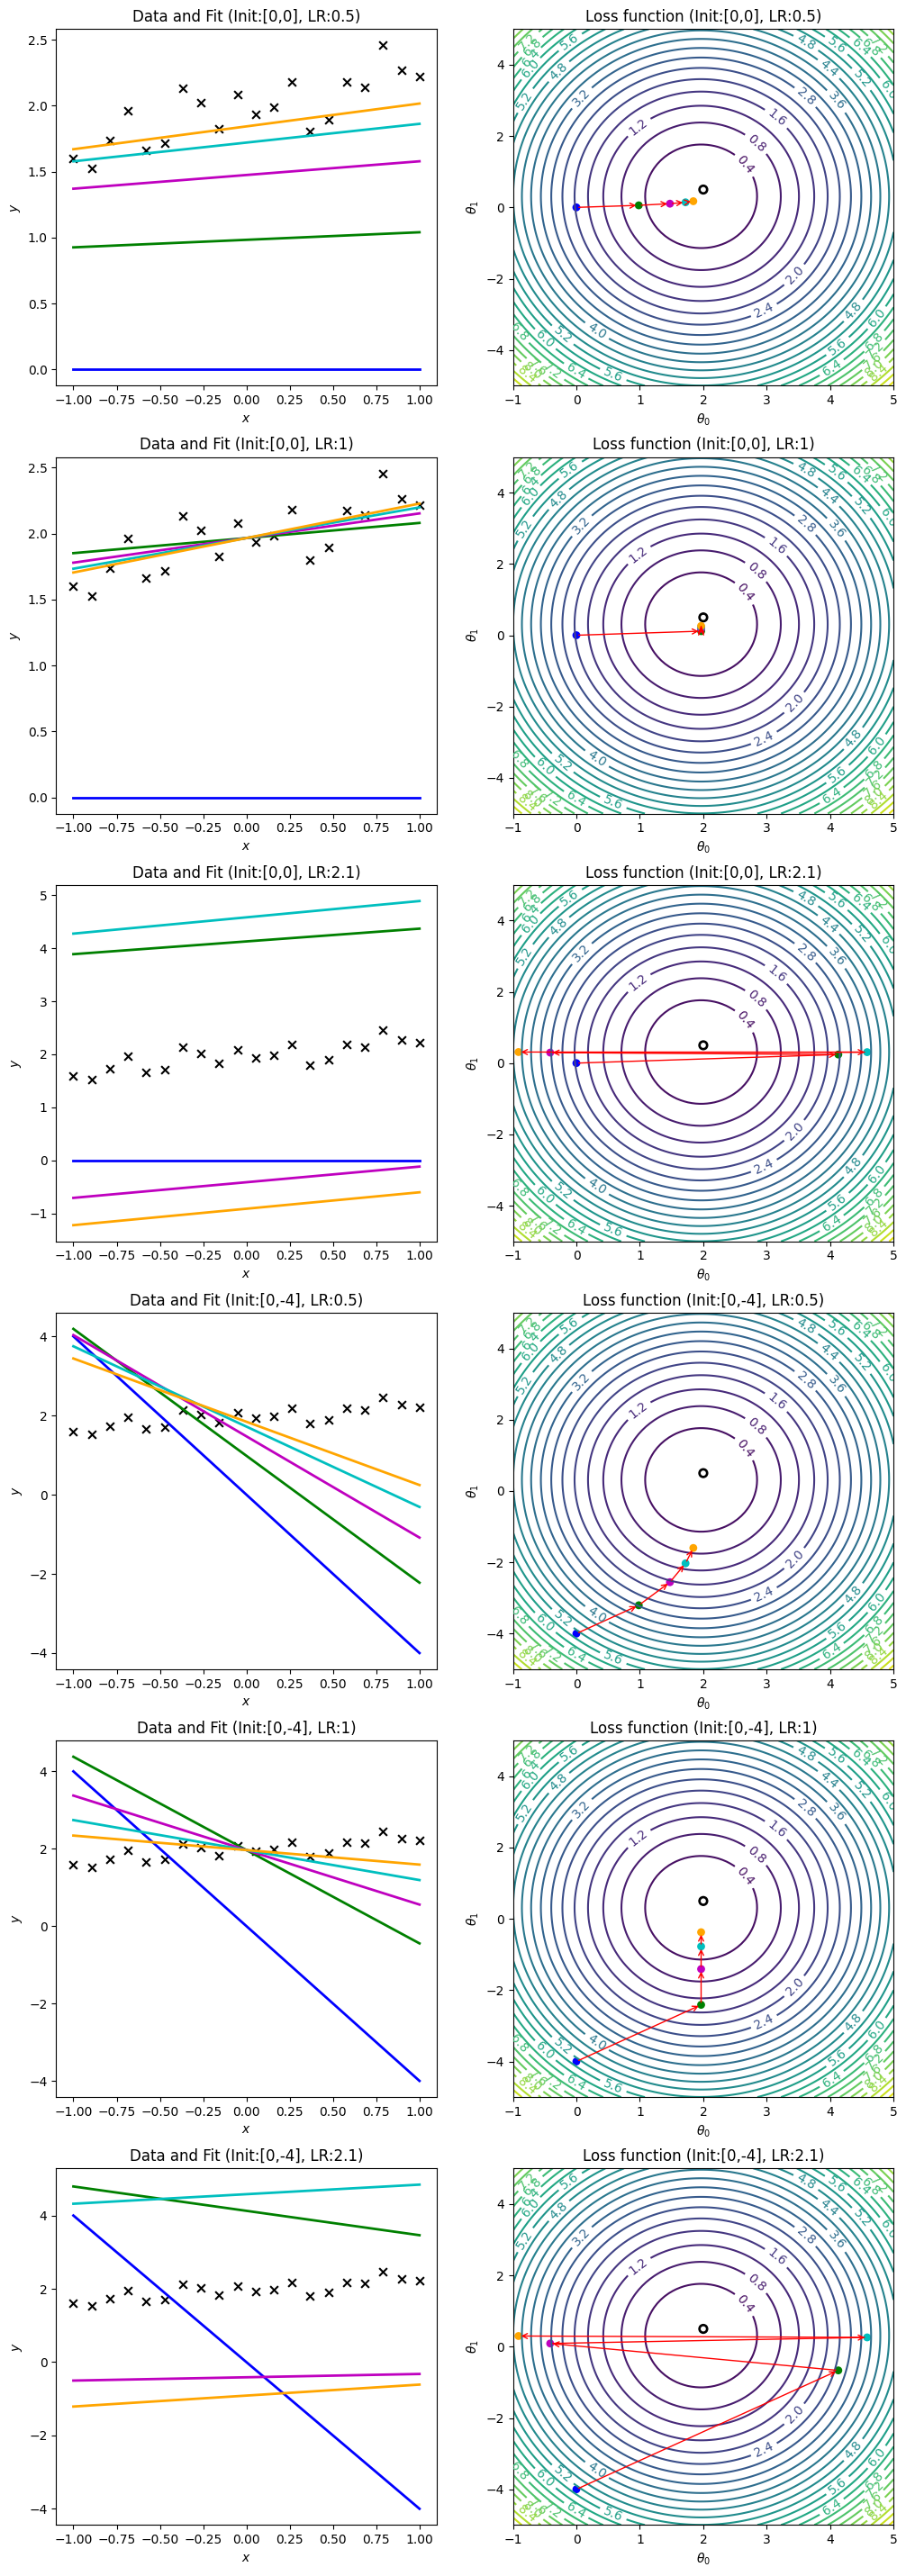

In [15]:
# Experiment with different initialization and learning rate combinations
### START CODE ###
init_list = [(0, 0), (0, -4)]  # initializations (theta0, theta1)
lr_list = [0.5, 1, 2.1]  # learning rates
### END CODE ###

# Left column shows the data and the changing linear regression models
# Right column shows the model parameters moving over the loss landscape
fig, ax = plt.subplots(nrows=len(init_list) * len(lr_list), ncols=2, figsize=(12, 36))

for i, init in enumerate(init_list):
    for j, lr in enumerate(lr_list):
        row_idx = i * len(lr_list) + j
        ax[row_idx][0].scatter(x, y, marker='x', s=40, color='k')
        theta0_grid = np.linspace(-1,5,101)
        theta1_grid = np.linspace(-5,5,101)
        L_grid = loss_func(theta0_grid[np.newaxis,:,np.newaxis],
                           theta1_grid[:,np.newaxis,np.newaxis])

        # A labeled contour plot for the right column
        X, Y = np.meshgrid(theta0_grid, theta1_grid)
        contours = ax[row_idx][1].contour(X, Y, L_grid, 30)
        ax[row_idx][1].clabel(contours)
        # The target parameter values indicated on the loss function contour plot
        ax[row_idx][1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

        # Take N = 4 steps with learning rate alpha down the steepest gradient, starting at init
        N = 4
        theta = [init] # placeholder list for storing historical parameters
        L = [loss_func(*theta[0])[0]] # placeholder list for storing historical loss values
        for _ in range(N):
            last_theta = theta[-1]
            this_theta = np.empty((2,))
            # Update theta
            ### START CODE ### (2 lines of code)
            this_theta[0] = last_theta[0] - lr * np.mean((y - model(x, last_theta[0], last_theta[1]))) * -1
            this_theta[1] = last_theta[1] - lr * np.mean((y - model(x, last_theta[0], last_theta[1]))*x) * -1
            ### END CODE ###
            theta.append(this_theta)
            L.append(loss_func(*this_theta))

        # Annotate the loss function plot with coloured points indicating the
        # parameters chosen and red arrows indicating the steps down the gradient.
        # Also plot the fit function on the LHS data plot in a matching colour.
        colors = ['b', 'g', 'm', 'c', 'orange']
        ax[row_idx][0].plot(x, model(x, *theta[0]), color=colors[0], lw=2,
                   label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
        for k in range(1,N+1):
            ax[row_idx][1].annotate('', xy=theta[k], xytext=theta[k-1],
                           arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                           va='center', ha='center')
            ax[row_idx][0].plot(x, model(x, *theta[k]), color=colors[k], lw=2,
                   label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[k]))
        ax[row_idx][1].scatter(*zip(*theta), c=colors, s=40, lw=0)

        # Labels and titles.
        ax[row_idx][1].set_xlabel(r'$\theta_0$')
        ax[row_idx][1].set_ylabel(r'$\theta_1$')
        ax[row_idx][1].set_title(f'Loss function (Init:[{init[0]},{init[1]}], LR:{lr})')
        ax[row_idx][0].set_xlabel(r'$x$')
        ax[row_idx][0].set_ylabel(r'$y$')
        ax[row_idx][0].set_title(f'Data and Fit (Init:[{init[0]},{init[1]}], LR:{lr})')
        axbox = ax[row_idx][0].get_position()

plt.show()

In [16]:
this_theta[1] = last_theta[1] - lr * np.sum((model(x, *last_theta) - y) * x) / m
np.sum((model(x, *last_theta) - y)*x)

-0.36819644329213164

## Part 2. **(5 pts)** ##
For the experiment above, briefly summarize what you observed about the impact of (i) initialization and (ii) learning rate, on the evolution of the model parameters.

Based on our experiment, we have learnt the folloing:
1. for the initialization of 0,0:
    - a. learning rate 0.5: The algorithm slowly gets closer to the global minimum, but the number of iterations look insuffucient for it to reach the global minimun and hence, as we can see, it stops very close, to the global minimum.
    - b. learning rate 1: The algorithm takes a very big jump at first to find the global minimum. In this case, it is lucky and reaches very close to the global minimum and takes shorter jumps and gets very close to the global minimum. It might not always get this lucky and might jump/cross the global minimum in other cases
    - c. learning rate 2.1: The algorithm takes very huge steps, and a we can see, each jump brings actually takes it further away from the global minimum. The jumps seem to be in the right direction and it has crossed/gone close to the global minimum point at multiple iterations. We will require a lot more iterations for the algorithm to arrive at the minimum point successfully, but cannot be sure as we have only noticed it going further in this set of iterations.

#

2. for initialization of 0, -4:
    - a. learning rate 0.5: The algorithm slowly gets closer to the global minimum, but the number of iterations seems to be insuffucient again for it to reach the global minimun and hence, as we can see, it stops very close, to the global minimum. It stops further away as compared to our first initialization though
    - b. learning rate 1: The algorithm takes a big jump at first to find the global minimum. The following shorter jumps are in the right direction and gets close to the global minimum. It is further away as compared to our first initializaion.
    - c. learning rate 2.1: Similar to the previous initialization the algorithm takes very huge steps. The initial few jumps brings it closer to the global minimum, but the later few take it further away. The jumps still seem to be in the right direction and it has crossed/gone close to the global minimum point at multiple iterations. We will require a lot more iterations for the algorithm to arrive at the minimum point successfully, but cannot be sure as we have only noticed it going further in this set of iterations.

#

Hence, impact of:
1. Initialization: Initialization impacts the evolution of model parameters. The initial initialization on ( 0, 0 ) as compared to ( 0, -4 ) lead to a faster arrival to the minimum as the point itself was closer to the minimum. Hence, the choice of initialization plays a role in how fast we can reach the minimum.

2. Learning rate: taking a very small learning rate , we might arrive at the minimum, but we will need multiple iterations and may be computationally intensive. On the other hand, large learning rates might completely miss the minimum and might actually start leadng us away from it. We have to take these factors into consideration before we pick out initialization point and learning rates.